## Unit 5 | Assignment - The Power of Plots

## Pymaceuticals Inc

![Laboratory](Images/Laboratory.jpg)

Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
* Your scatter plots must include [error bars](https://en.wikipedia.org/wiki/Error_bar). This will allow the company to account for variability between mice. You may want to look into [`pandas.DataFrame.sem`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sem.html) for ideas on how to calculate this.
* Remember when making your plots to consider aesthetics!
  * Your legends should not be overlaid on top of any data.
  * Your bar graph should indicate tumor growth as red and tumor reduction as green.
    It should also include a label with the percentage change for each bar. You may want to consult this [tutorial](http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/) for relevant code snippets.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pymaceuticals/Pymaceuticals_Example.pdf) for a reference on expected format. (Note: For this example, you are not required to match the tables or data frames included. Your only goal is to build the scatter plots and bar graphs. Consider the tables to be potential clues, but feel free to approach this problem, however, you like.)

## Copyright

Coding Boot Camp (C) 2016. All Rights Reserved.


Analysis:
    
Observed trend 1 - From the Tumor Response to Treatment plot, we can deduce 
that only the Capomulin medicine is treating the tumor and reducing the volume of the tumor as compared to the other drugs.

Observed trend 2 - From the Survival During treatment plot, we can deduce 
that the the survival rate is more with the use of Capomulin medicine as compared to the other drugs.

Observed trend 3 - From the Tumor Over 45 Days Treament plot, we can deduce 
that only the Capomulin medicine is treating the tumor with maximum percentage reduction in volume as compared to the other drugs.

In [1]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Path to the files
path = "raw_data/"

#Reading the files and creating the dataframes
clinicaltrial = pd.read_csv(path+"clinicaltrial_data.csv")
mouse_drug = pd.read_csv(path+"mouse_drug_data.csv")

In [3]:
#Merge the two dataframe on the mouse id
Clinicaltrial_mouse_drug = pd.merge(clinicaltrial,mouse_drug, on="Mouse ID",how ="left")
CMD = Clinicaltrial_mouse_drug

# Tumor Response to the Treatment

In [4]:
CMD_TumVol = CMD.loc[:,["Drug","Timepoint","Tumor Volume (mm3)"]]
CMD_TumVol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.0
1,Ketapril,0,45.0
2,Ketapril,0,45.0
3,Ketapril,0,45.0
4,Ketapril,0,45.0


In [5]:
CMD_TumVol_G = CMD_TumVol.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

In [6]:
CMD_TumVol_GD = pd.DataFrame(CMD_TumVol_G)
CMD_TumVol_GD.head() #Display

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [7]:
CMD_TumVol_P = CMD_TumVol_G.reset_index()

In [8]:
CMD_TumVol_PD= pd.DataFrame(CMD_TumVol_P)
CMD_TumVol_PD.head() #No need to display

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [9]:
CMD_TumVol_PivotTable = CMD_TumVol_PD.pivot_table(values='Tumor Volume (mm3)',index="Timepoint",
                                                     columns="Drug")
CMD_TumVol_PivotTable #Display

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [10]:
#Method 1 - Plotting without errorbar

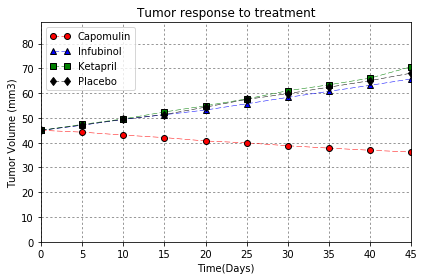

In [11]:
HandleC,= plt.plot(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Capomulin"],
          linewidth=0.5,color="r",linestyle="--",marker='o',markeredgecolor="black",label="Capomulin")
HandleI,= plt.plot(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Infubinol"],
          linewidth=0.5,color="b",linestyle="--",marker='^',markeredgecolor="black",label="Infubinol")
HandleK,= plt.plot(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Ketapril"],
          linewidth=0.5,color="g",linestyle="--",marker='s',markeredgecolor="black",label="Ketapril")
HandleP,= plt.plot(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Placebo"],
          linewidth=0.5,color="black",linestyle="--",marker='d',markeredgecolor="black",label="Placebo")
plt.legend(handles=[HandleC,HandleI,HandleK,HandleP],numpoints=2)
plt.xlim(0,CMD["Timepoint"].max())
plt.ylim(0,CMD["Tumor Volume (mm3)"].max()+10)
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor response to treatment")
plt.grid(color='black', linestyle=':',alpha=0.5)
plt.tight_layout()
plt.show()
plt.show()

In [12]:
#Method 2 - With errorbar

In [13]:
#Calculating error and converting it to the pivot table
CMD_TumVol_SEM = CMD_TumVol.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
CMD_TumVol_SEM = CMD_TumVol_SEM.reset_index()
CMD_TumVol_SEM = pd.DataFrame(CMD_TumVol_SEM)
CMD_TumVol_SEM_PT = CMD_TumVol_SEM.pivot_table(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)") 
CMD_TumVol_SEM_PT

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


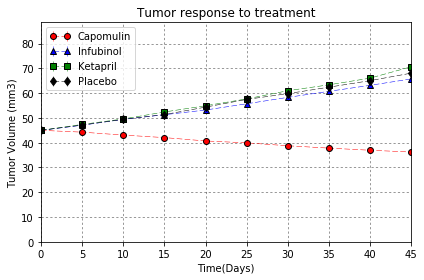

In [14]:
plt.errorbar(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Capomulin"],
             yerr=CMD_TumVol_SEM_PT["Capomulin"],linewidth=0.5,color="r",linestyle="--",
             marker='o',markeredgecolor="black",label="Capomulin")
plt.errorbar(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Infubinol"],
             yerr=CMD_TumVol_SEM_PT["Infubinol"],
          linewidth=0.5,color="b",linestyle="--",marker='^',markeredgecolor="black",label="Infubinol")
plt.errorbar(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Ketapril"],
             yerr=CMD_TumVol_SEM_PT["Ketapril"],
          linewidth=0.5,color="g",linestyle="--",marker='s',markeredgecolor="black",label="Ketapril")
plt.errorbar(CMD_TumVol_PivotTable.index, CMD_TumVol_PivotTable["Placebo"],
              yerr=CMD_TumVol_SEM_PT["Placebo"], 
          linewidth=0.5,color="black",linestyle="--",marker='d',markeredgecolor="black",label="Placebo")
plt.legend(numpoints=2,loc="best")
plt.xlim(0,CMD["Timepoint"].max())
plt.ylim(0,CMD["Tumor Volume (mm3)"].max()+10)
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor response to treatment")
plt.grid(color='black', linestyle=':',alpha=0.5)
plt.tight_layout()
plt.show()

# Metastatic Response to Treatment

In [15]:
CMD_MetSite = CMD.loc[:,["Drug","Timepoint","Metastatic Sites"]]

In [16]:
#Method 1 - Using Pivot Table with errorbar

In [17]:
CMD_MetSite_Sem = CMD_MetSite.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
CMD_MetSite_Sem = CMD_MetSite_Sem.reset_index()
CMD_MedSite_Sem = pd.DataFrame(CMD_MetSite_Sem)
CMD_MedSite_Sem_PT = CMD_MedSite_Sem.pivot_table(index="Timepoint",
                                                 columns="Drug",
                                                 values="Metastatic Sites")
#CMD_MedSite_Sem_PT

In [18]:
CMD_MetSite_G = CMD_MetSite.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

In [19]:
CMD_MetSite_GD = pd.DataFrame(CMD_MetSite_G)
#CMD_MetSite_GD.head()

In [20]:
CMD_MetSite_P = CMD_MetSite_G.reset_index()

In [21]:
CMD_MetSite_PD = pd.DataFrame(CMD_MetSite_P)
#CMD_MetSite_PD.head()

In [22]:
CMD_MetSite_PivotTable = CMD_MetSite_PD.pivot_table(index="Timepoint",
                                                    columns="Drug",
                                                    values="Metastatic Sites")
#CMD_MetSite_PivotTable

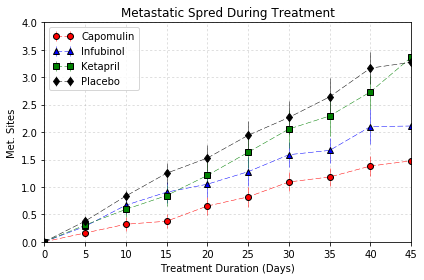

In [23]:
plt.errorbar(CMD_MetSite_PivotTable.index, CMD_MetSite_PivotTable["Capomulin"],
             yerr=CMD_MedSite_Sem_PT["Capomulin"],linewidth=0.5,color="r",linestyle="--",
             marker='o',markeredgecolor="black",label="Capomulin")
plt.errorbar(CMD_MetSite_PivotTable.index, CMD_MetSite_PivotTable["Infubinol"],
             yerr=CMD_MedSite_Sem_PT["Infubinol"],
          linewidth=0.5,color="b",linestyle="--",marker='^',markeredgecolor="black",label="Infubinol")
plt.errorbar(CMD_MetSite_PivotTable.index, CMD_MetSite_PivotTable["Ketapril"],
             yerr=CMD_MedSite_Sem_PT["Ketapril"],
          linewidth=0.5,color="g",linestyle="--",marker='s',markeredgecolor="black",label="Ketapril")
plt.errorbar(CMD_MetSite_PivotTable.index, CMD_MetSite_PivotTable["Placebo"],
              yerr=CMD_MedSite_Sem_PT["Placebo"], 
          linewidth=0.5,color="black",linestyle="--",marker='d',markeredgecolor="black",label="Placebo")

plt.xlim(0,CMD_MetSite["Timepoint"].max())
plt.ylim(0,CMD_MetSite["Metastatic Sites"].max())
plt.legend(numpoints=2,loc="best")
plt.grid(linestyle=":",alpha=0.5)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spred During Treatment")
plt.tight_layout()
plt.show()

# Survival Rates

In [24]:
CMD_Survival = CMD.loc[:,["Drug","Timepoint","Mouse ID"]]
CMD_Survival = CMD_Survival.rename(columns={"Mouse ID":"Mouse Count"})

In [25]:
CMD_Survival_G = CMD_Survival.groupby(["Drug","Timepoint"])["Mouse Count"].count()
CMD_Survival_G = pd.DataFrame(CMD_Survival_G)
CMD_Survival_G.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [26]:
#Method 1 - Without errorbar)

In [27]:
CMD_Survival_P = CMD_Survival_G.reset_index()
CMD_Survival_P = pd.DataFrame(CMD_Survival_P)
#CMD_Survival_P

In [28]:
CMD_Survival.PivotTable = CMD_Survival_P.pivot_table(values="Mouse Count",index="Timepoint",
                                                     columns="Drug")
#CMD_Survival.PivotTable

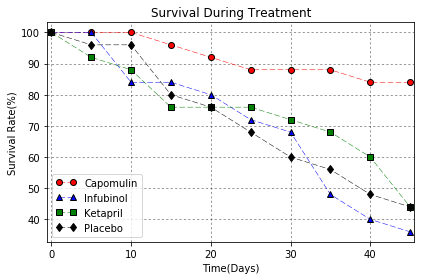

In [29]:
HandleC,= plt.plot(CMD_Survival.PivotTable.index, (CMD_Survival.PivotTable["Capomulin"]/CMD_Survival.PivotTable["Capomulin"][0])*100,
          linewidth=0.5,color="r",linestyle="--",marker='o',markeredgecolor="black",label="Capomulin")
HandleI,= plt.plot(CMD_Survival.PivotTable.index, (CMD_Survival.PivotTable["Infubinol"]/CMD_Survival.PivotTable["Infubinol"][0])*100,
          linewidth=0.5,color="b",linestyle="--",marker='^',markeredgecolor="black",label="Infubinol")
HandleK,= plt.plot(CMD_Survival.PivotTable.index, (CMD_Survival.PivotTable["Ketapril"]/CMD_Survival.PivotTable["Ketapril"][0])*100,
          linewidth=0.5,color="g",linestyle="--",marker='s',markeredgecolor="black",label="Ketapril")
HandleP,= plt.plot(CMD_Survival.PivotTable.index, (CMD_Survival.PivotTable["Placebo"]/CMD_Survival.PivotTable["Placebo"][0])*100,
          linewidth=0.5,color="black",linestyle="--",marker='d',markeredgecolor="black",label="Placebo")
plt.legend(handles=[HandleC,HandleI,HandleK,HandleP],numpoints=2)
plt.xlim(-.5,45.5)
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")
plt.title("Survival During Treatment")
plt.grid(color='black', linestyle=':',alpha=0.5)
plt.tight_layout()
plt.show()

In [30]:
#Method 2 - With errorbar

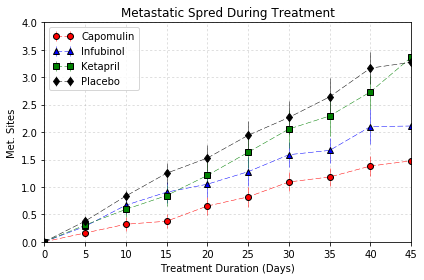

In [31]:
plt.errorbar(CMD_MetSite_PivotTable.index, CMD_MetSite_PivotTable["Capomulin"],
             yerr=CMD_MedSite_Sem_PT["Capomulin"],linewidth=0.5,color="r",linestyle="--",
             marker='o',markeredgecolor="black",label="Capomulin")
plt.errorbar(CMD_MetSite_PivotTable.index, CMD_MetSite_PivotTable["Infubinol"],
             yerr=CMD_MedSite_Sem_PT["Infubinol"],
          linewidth=0.5,color="b",linestyle="--",marker='^',markeredgecolor="black",label="Infubinol")
plt.errorbar(CMD_MetSite_PivotTable.index, CMD_MetSite_PivotTable["Ketapril"],
             yerr=CMD_MedSite_Sem_PT["Ketapril"],
          linewidth=0.5,color="g",linestyle="--",marker='s',markeredgecolor="black",label="Ketapril")
plt.errorbar(CMD_MetSite_PivotTable.index, CMD_MetSite_PivotTable["Placebo"],
              yerr=CMD_MedSite_Sem_PT["Placebo"], 
          linewidth=0.5,color="black",linestyle="--",marker='d',markeredgecolor="black",label="Placebo")

plt.xlim(0,CMD_MetSite["Timepoint"].max())
plt.ylim(0,CMD_MetSite["Metastatic Sites"].max())
plt.legend(numpoints=2,loc="best")
plt.grid(linestyle=":",alpha=0.5)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spred During Treatment")
plt.tight_layout()
plt.show()

# Summary Bar Graph

In [32]:
TumVol_Per_Chg =  (CMD_TumVol_PivotTable.iloc[-1] - CMD_TumVol_PivotTable.iloc[0]) / CMD_TumVol_PivotTable.iloc[0] * 100
TumVol_Per_Chg = TumVol_Per_Chg.reset_index()
TumVol_Per_Chg = pd.DataFrame(TumVol_Per_Chg)
TumVol_Per_Chg.rename(columns={0:"Total Volume Percent Change"},inplace=True)
TumVol_Per_Chg

,Drug,Total Volume Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [33]:
TumVol_Per_Chg_CIKP = TumVol_Per_Chg.loc[TumVol_Per_Chg["Drug"].isin
                                         (["Capomulin","Infubinol","Ketapril","Placebo"]),
                                         ["Drug","Total Volume Percent Change"]]
TumVol_Per_Chg_CIKP["Sign"] = (TumVol_Per_Chg_CIKP["Total Volume Percent Change"] < 0)
TumVol_Per_Chg_CIKP

,Drug,Total Volume Percent Change,Sign
0,Capomulin,-19.475303,True
2,Infubinol,46.123472,False
3,Ketapril,57.028795,False
5,Placebo,51.297960,False


In [34]:
x_axis = np.arange(len(TumVol_Per_Chg_CIKP))
x_ticks = TumVol_Per_Chg_CIKP["Drug"]
x_ticks_list = list(x_ticks)

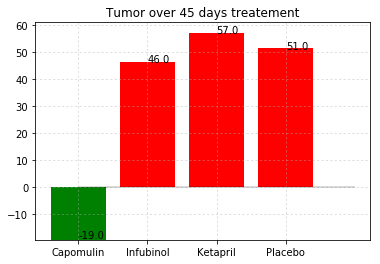

In [35]:
plt.bar(x_axis,TumVol_Per_Chg_CIKP["Total Volume Percent Change"],
        color=TumVol_Per_Chg_CIKP["Sign"].map({True:"g",False:"r"}))      

plt.hlines(0, 0, len(x_axis), alpha=0.2)
plt.xticks(x_axis,x_ticks_list)
plt.title("Tumor over 45 days treatement")
plt.grid(linestyle=":",alpha=0.5)
for a,b in zip(x_axis, round(TumVol_Per_Chg_CIKP["Total Volume Percent Change"])):
    plt.text(a, b, str(b))
plt.show()